In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import calendar
# read the dataset
data = pd.read_csv('online_shoppers_intention.csv')

In [7]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
#Finding Missing Values
print(data.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [9]:
data.Revenue = data.Revenue.astype('int')
data.Weekend = data.Weekend.astype('int')

In [10]:
# Replacing visitor_type to int
print(data['VisitorType'].unique())
df_shop = data.replace({'VisitorType' : { 'New_Visitor' : 0, 'Returning_Visitor' : 1, 'Other' : 2 }})

# Coverting month column to numeric numeric values
monthlist = df_shop['Month'].replace('June', 'Jun')
mlist = []
m = np.array(monthlist)
for mi in m:
    a = list(calendar.month_abbr).index(mi)
    mlist.append(a)
df_shop['Month'] =  mlist

# Delete records with NAs
df_shop.dropna(inplace=True)

df_shop.head()

['Returning_Visitor' 'New_Visitor' 'Other']


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,1,0


In [11]:
data.shape

(12330, 18)

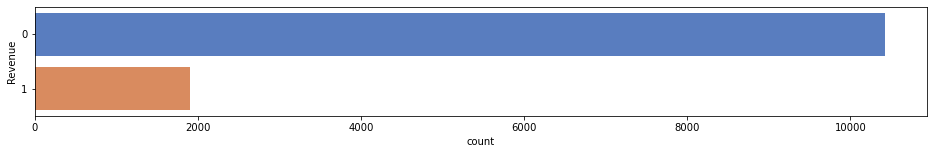

In [12]:
# Checking the balance of prediction labels
plt.figure(figsize=(16,2))
fig = sns.countplot(y="Revenue", data=data, palette="muted")
plt.show()

There are more false than true

<AxesSubplot:xlabel='Month', ylabel='Count'>

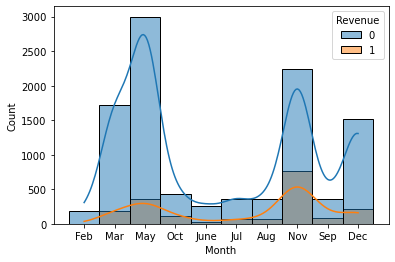

In [13]:
sns.histplot(data=data, x='Month', hue='Revenue', kde=True)

There are more false prediction across months; indicating an imbalance class labels. Invaribly majority of the visitos do not have the intention to buy anything.

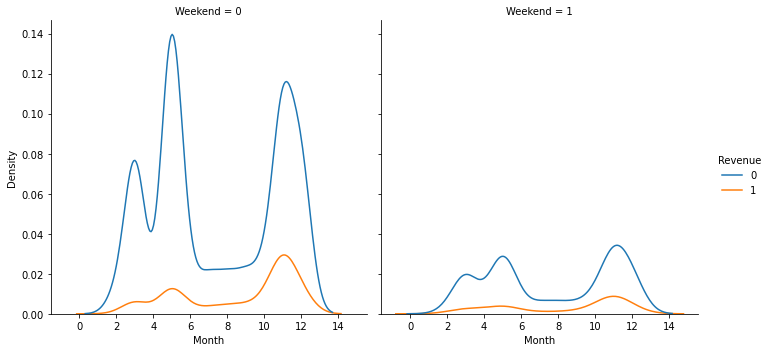

In [14]:
sns.displot(data=df_shop, x='Month', hue='Revenue', col='Weekend', kind='kde')

Similar situation played out when considering the Week

<AxesSubplot:>

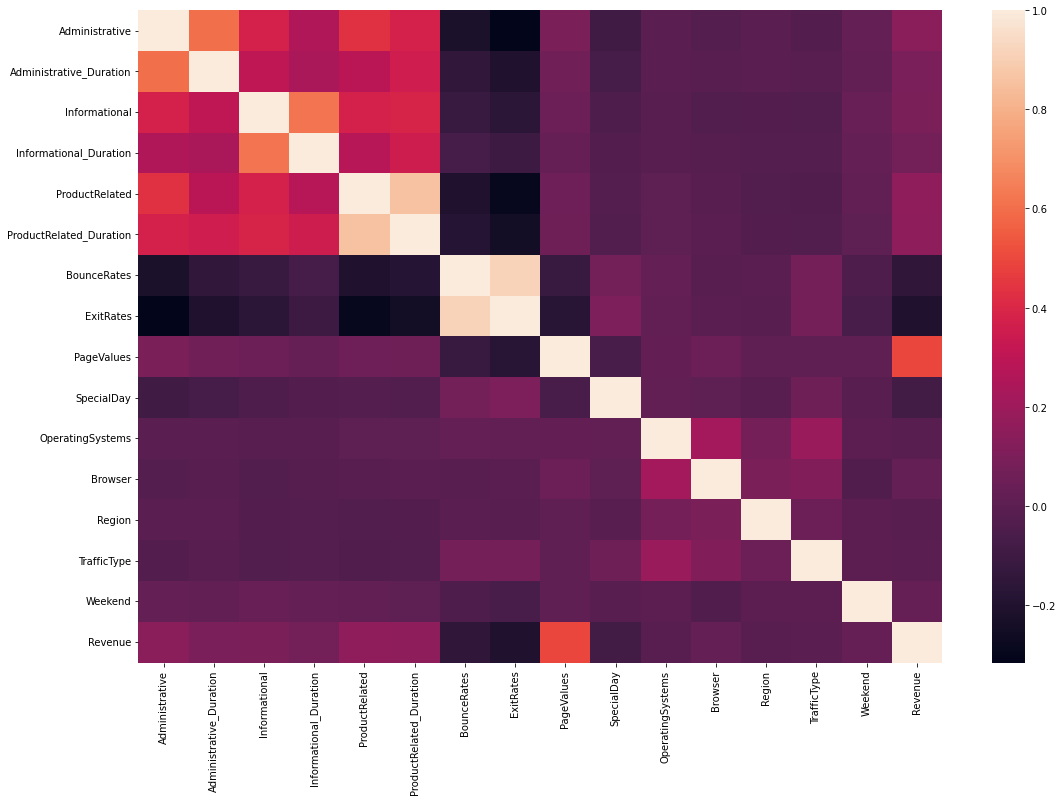

In [15]:
plt.figure(figsize=(18,12))
sns.heatmap(data.corr())
##Pearson Correlation

The above show that there were some correlations found between administrative data (both duration and point), Information, Product Related,Rates(Exit and Bounce), Page Value etc. To look further; hence below

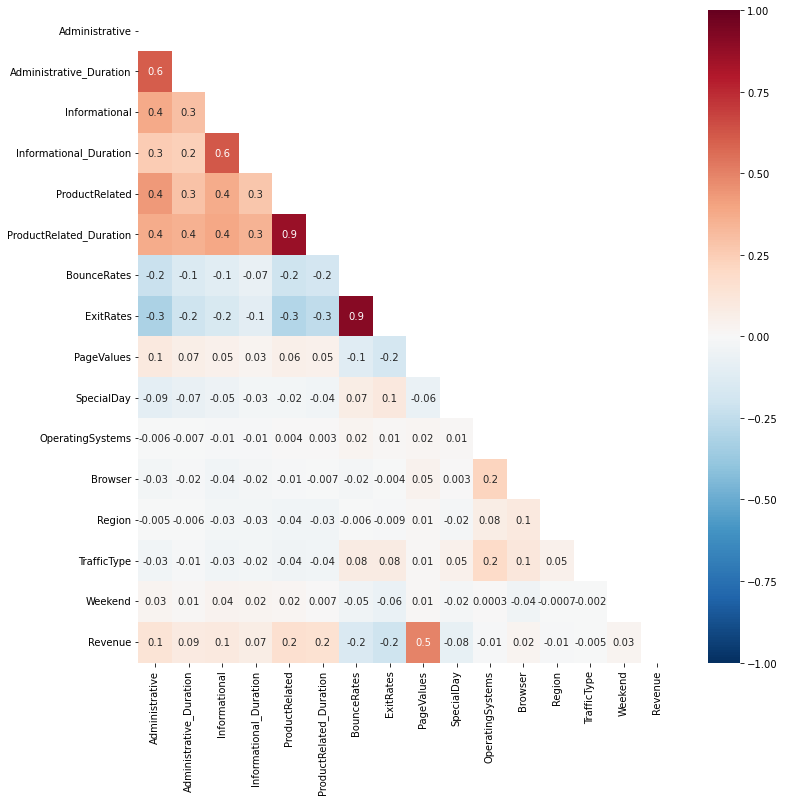

In [16]:
matrix = np.triu(data.corr())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

From the above well labeled heatmap, there are high correlation (>= 0.7)found between :
        i. BounceRates & ExitRates (0.9).
        ii. ProductRelated & ProductRelated_Duration (0.9).
 There were moderate Correlations (0.3< : <0.7) between:
      i. Administrative
      ii. Administrative_Duration, 
      iii. Informational 
      iv. Informational_Duration, 
      v. ProductRelated, and 
      vi. roductRelated_Duration.
      vii.PageValues and Revenue.

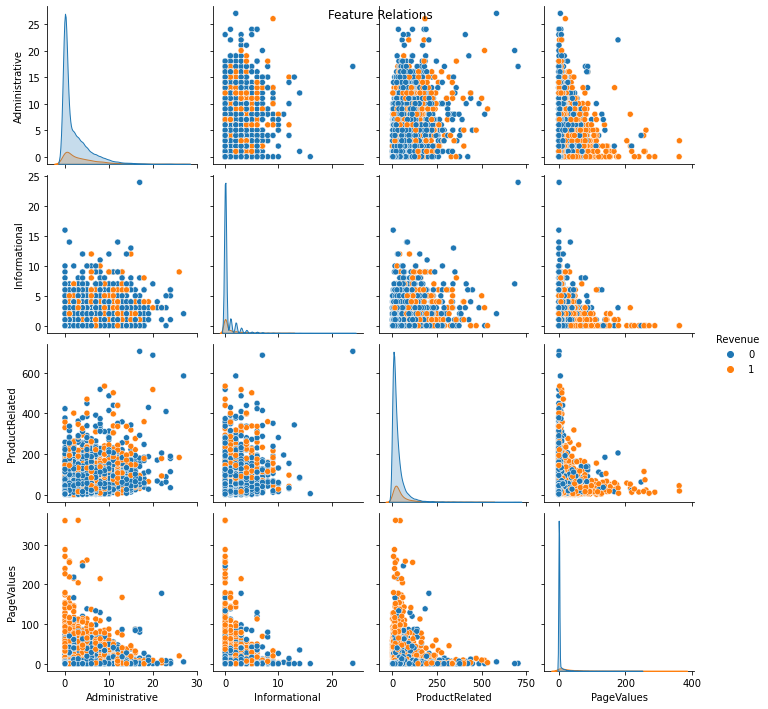

In [17]:
g1 = sns.pairplot(data[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'Revenue']], hue='Revenue')
g1.fig.suptitle('Feature Relations')
plt.show()

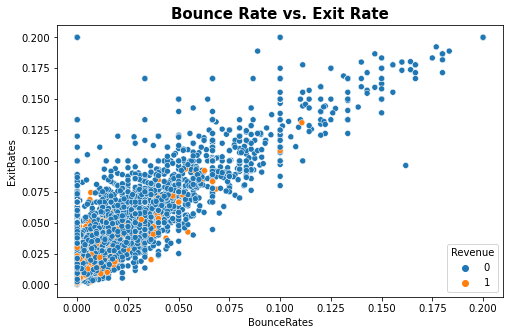

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'BounceRates',y='ExitRates',data=df_shop,hue='Revenue')
plt.title('Bounce Rate vs. Exit Rate', fontweight='bold', fontsize=15)
plt.show()

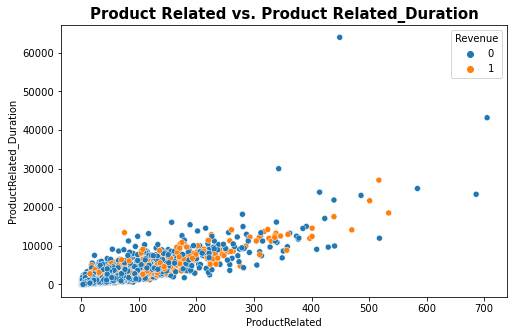

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x= 'ProductRelated',y='ProductRelated_Duration',data=data,hue='Revenue')
plt.title('Product Related vs. Product Related_Duration', fontweight='bold', fontsize=15)
plt.show()

In [ ]:
Generally, visitors tend to visit less pages, and spend less time, if they are not going to make a purchase.
The number of product related pages, and the time spent on them, is higher than account related or informational pages.
The triangle plot showed they are normally distributed as shown below;

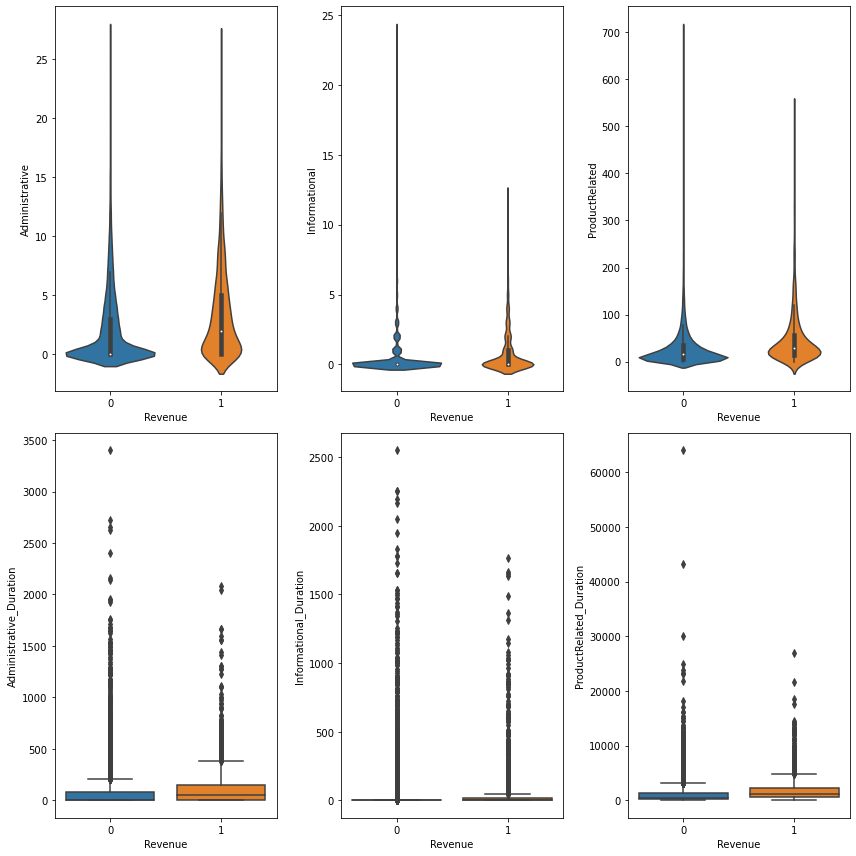

In [20]:
#Web Page Analysis
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=data, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=data, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=data, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=data, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=data, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=data, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.show()

## Page Metrics Analysis

C:\Users\Kenny\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kenny\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kenny\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

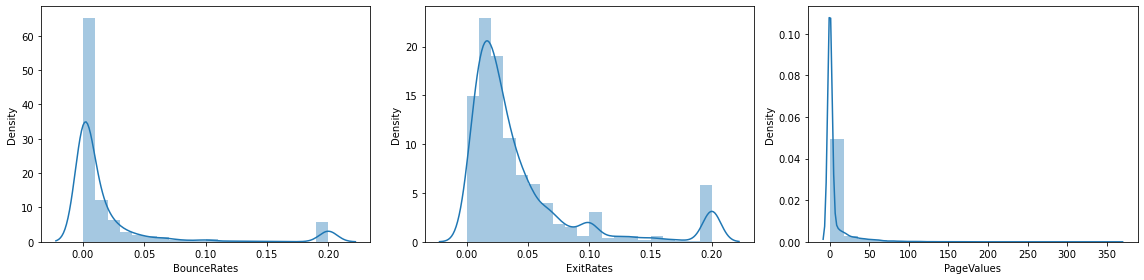

In [21]:
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.distplot(data['BounceRates'], bins=20, ax=ax1)
sns.distplot(data['ExitRates'], bins=20, ax=ax2)
sns.distplot(data['PageValues'], bins=20, ax=ax3)

plt.tight_layout()
plt.show()

    BounceRates & PageValues do not follow a normal distribution.
    All 3 features have distributions that are skewed right.
    All 3 distributions have a lot of outliers.
    The average bounce and exit rates of most of our data points is low, which is good, since high rates identicate that visitors are not engaging with the online services.
    Exit rate has more high values than bounce rate; where transaction confirmation pages for example will cause the average exit rate to increase.
    Bounce rate ==> the percentage where the first page visited was the only page visited in that session.
    Exit rate of a page ==> The percentage where that page was the last page visited in the session, out of all visits to that page.



Visitor Analysis

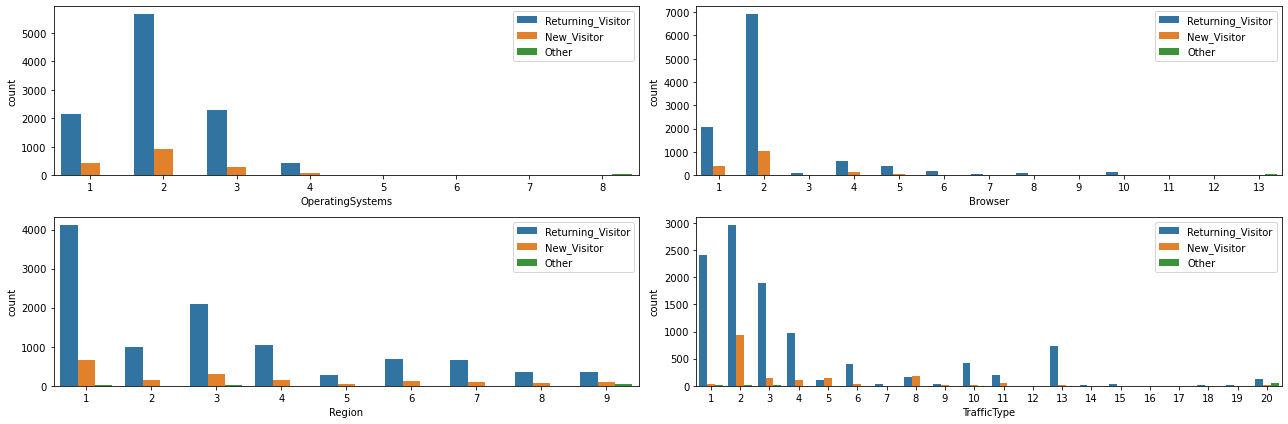

In [22]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=data, x='OperatingSystems', hue='VisitorType', ax=ax1)
sns.countplot(data=data, x='Browser', hue='VisitorType', ax=ax2)
sns.countplot(data=data, x='Region', hue='VisitorType', ax=ax3)
sns.countplot(data=data, x='TrafficType', hue='VisitorType', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

    One Operating system is responsible for ~7000 of the examples in our dataset.
    Four out of the eight operating systems used, are responsible of a very small number (<200) of the examples in our dataset.
    A similar case is seen with the browsers used by visitors, with 1 dominant browser, 3 with decent representation in the dataset, and the rest are rarey used.
    It looks like we have a very regionally diverse traffic and traffic sources in our dataset.


## Visit Date Analysis

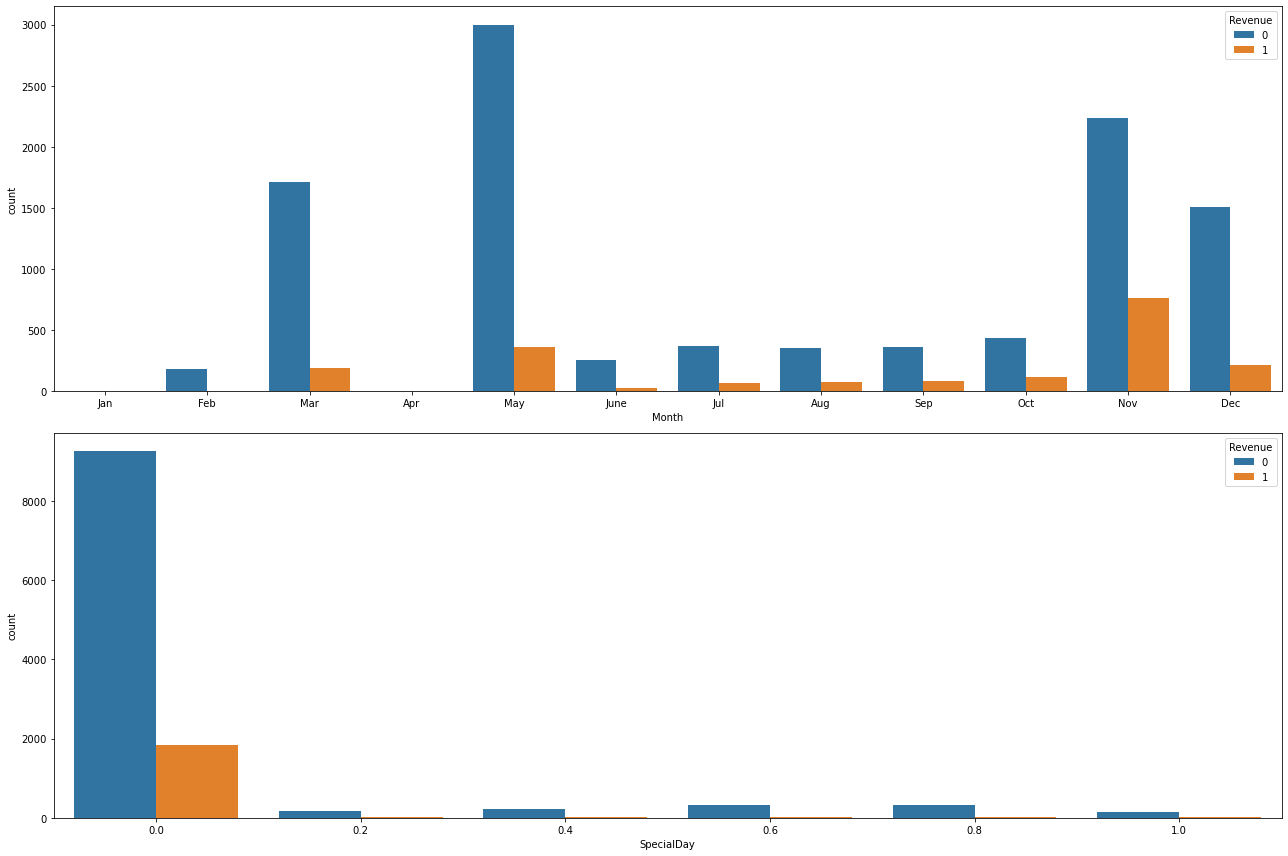

In [23]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=data, x='Month', hue='Revenue', ax=ax1, order=orderlist)
sns.countplot(data=data, x='SpecialDay', hue='Revenue', ax=ax2)

plt.tight_layout()
plt.show()

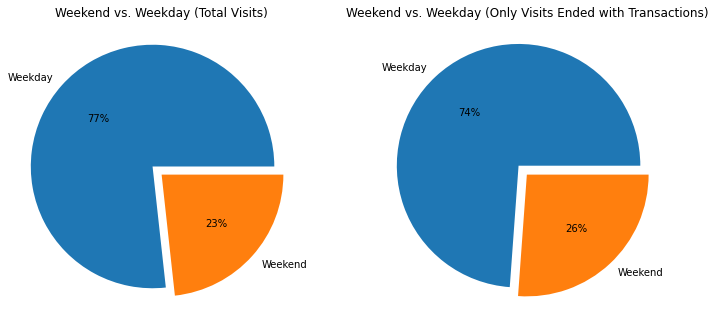

In [24]:
fig, ax = plt.subplots(1, 2,figsize=(12, 6), subplot_kw=dict(aspect="equal"))
ax[0].pie(data['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[0].set_title('Weekend vs. Weekday (Total Visits)')
ax[1].pie(data[data['Revenue'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[1].set_title('Weekend vs. Weekday (Only Visits Ended with Transactions)')
#fig.suptitle('Weekend Visits')
plt.show()

 May is the month with the highest number of visits.
 Most transactions happen during the end of the year particulalry in Nov.
  Special days influences transactions intiatated. The closer the visit date to a special day (like black Friday, new year's, ... etc) the more likely it will end up in a transaction
Most of transactions happen on special days (SpecialDay =0).
There are slight increase in the number of transactions happening on weekends compared to those on weekdays.

In [25]:
print(data['VisitorType'].unique())
data_shop = data.replace({'VisitorType' : { 'New_Visitor' : 0, 'Returning_Visitor' : 1, 'Other' : 2 }})

# Coverting month column to numeric numeric values
monthlist = data_shop['Month'].replace('June', 'Jun')
mlist = []
m = np.array(monthlist)
for mi in m:
    a = list(calendar.month_abbr).index(mi)
    mlist.append(a)
data_shop['Month'] =  mlist

# Delete records with NAs
data_shop.dropna(inplace=True)

data_shop.head()

['Returning_Visitor' 'New_Visitor' 'Other']


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,1,0


In [26]:
data1= pd.concat([data,pd.get_dummies(data['Month'], prefix='Month')], axis=1).drop(['Month'],axis=1)
data1 = pd.concat([data1,pd.get_dummies(data1['VisitorType'], prefix='VisitorType')], axis=1).drop(['VisitorType'],axis=1)
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [47]:
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [55]:
y = data1['Revenue']
X = data1.drop(['Revenue'], axis=1)

from sklearn.tree import DecisionTreeClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(Xtrain, ytrain)
print(model.score(Xtest, ytest))


0.8556366585563666


In [29]:
from sklearn.ensemble import RandomForestClassifier
X_train, Xtest, y_train, ytest = train_test_split(X, y, test_size=0.10, random_state=42)
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
print(model2.score(Xtest, ytest))

0.8961881589618816


In [30]:
LR = LogisticRegression()
LR.fit(X_train,y_train)


C:\Users\Kenny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
LR_preds = LR.predict(Xtest)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(LR_preds, ytest))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1133
           1       0.34      0.69      0.46       100

    accuracy                           0.87      1233
   macro avg       0.65      0.79      0.69      1233
weighted avg       0.92      0.87      0.89      1233



In [34]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier()
KN.fit(X_train,y_train)
KN_preds = KN.predict(Xtest)
print(classification_report(KN_preds, ytest))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1147
           1       0.26      0.60      0.36        86

    accuracy                           0.85      1233
   macro avg       0.61      0.74      0.64      1233
weighted avg       0.92      0.85      0.88      1233



In [35]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
RF_preds = RF.predict(Xtest)
print(classification_report(RF_preds, ytest))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1082
           1       0.54      0.72      0.62       151

    accuracy                           0.89      1233
   macro avg       0.75      0.82      0.78      1233
weighted avg       0.91      0.89      0.90      1233



In [36]:
from sklearn.naive_bayes import GaussianNB
GB=GaussianNB()
GB.fit(X_train,y_train)
GB_preds = GB.predict(Xtest)
print(classification_report(GB_preds, ytest))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       938
           1       0.56      0.39      0.46       295

    accuracy                           0.78      1233
   macro avg       0.69      0.65      0.66      1233
weighted avg       0.76      0.78      0.77      1233



In [81]:
fav_data={"accuracy":[89,78,87,85],"precision":[96,82,97,97],"recall":[91,91, 88, 87], "f1-score":[94,86,92,92 ]}
data2=pd.DataFrame(data=fav_data, index=["RandomForestClassifier", "NaiveBayes", "LogisticRegression","KNeighborsClassifie"])
data2


,accuracy,precision,recall,f1-score
RandomForestClassifier,89,96,91,94
NaiveBayes,78,82,91,86
LogisticRegression,87,97,88,92
KNeighborsClassifie,85,97,87,92


Random Forest Classifer and Naive Bayes have higher recall in modelling 
Logistic Regression and KNeighbors have higher precision while Random Forest show a higher accuracy model for the prediction. 